# <span style="background-color: black; color:white;"> Importing Libraries</span>

In [27]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# <span style="background-color:black; color:white;"> Reading File</span>

In [2]:
df=pd.read_csv("telecom_churn.csv")
df

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,Contract,MonthlyCharges,TotalCharges,Churn
0,C00001,Male,0,Yes,Yes,54,Month-to-month,50.77,2732.87,No
1,C00002,Male,0,No,Yes,28,One year,116.85,3278.97,No
2,C00003,Male,1,No,Yes,31,Month-to-month,90.67,2813.66,Yes
3,C00004,Male,0,No,Yes,6,Month-to-month,50.64,311.87,No
4,C00005,Female,0,No,No,54,Month-to-month,43.57,2347.83,No
...,...,...,...,...,...,...,...,...,...,...
9995,C09996,Female,1,No,No,25,Two year,83.03,2068.16,No
9996,C09997,Female,0,Yes,No,33,Two year,118.68,3907.27,No
9997,C09998,Male,0,No,Yes,38,Month-to-month,46.70,1777.72,Yes
9998,C09999,Female,0,No,Yes,3,One year,105.74,323.23,No


# <span style="background-color:black; color:white;"> Basic Analysis</span>

In [3]:
df.head()

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,Contract,MonthlyCharges,TotalCharges,Churn
0,C00001,Male,0,Yes,Yes,54,Month-to-month,50.77,2732.87,No
1,C00002,Male,0,No,Yes,28,One year,116.85,3278.97,No
2,C00003,Male,1,No,Yes,31,Month-to-month,90.67,2813.66,Yes
3,C00004,Male,0,No,Yes,6,Month-to-month,50.64,311.87,No
4,C00005,Female,0,No,No,54,Month-to-month,43.57,2347.83,No


In [4]:
df.describe()

,SeniorCitizen,Tenure,MonthlyCharges,TotalCharges
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.153300,36.687900,69.468808,2554.991830
std,0.360294,20.841404,28.895571,1898.673561
min,0.000000,1.000000,20.010000,17.370000
25%,0.000000,18.000000,44.310000,1021.285000
50%,0.000000,37.000000,69.045000,2127.855000
75%,0.000000,55.000000,94.280000,3724.737500
max,1.000000,72.000000,119.990000,8624.300000


In [5]:
print("Dataset info:",df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CustomerID      10000 non-null  object 
 1   Gender          10000 non-null  object 
 2   SeniorCitizen   10000 non-null  int64  
 3   Partner         10000 non-null  object 
 4   Dependents      10000 non-null  object 
 5   Tenure          10000 non-null  int64  
 6   Contract        10000 non-null  object 
 7   MonthlyCharges  10000 non-null  float64
 8   TotalCharges    10000 non-null  float64
 9   Churn           10000 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 781.4+ KB
Dataset info: None


In [6]:
print("Dataset shape:", df.shape)

Dataset shape: (10000, 10)


In [7]:
print("Missing values:\n", df.isnull().sum())

Missing values:
 CustomerID        0
Gender            0
SeniorCitizen     0
Partner           0
Dependents        0
Tenure            0
Contract          0
MonthlyCharges    0
TotalCharges      0
Churn             0
dtype: int64


In [8]:
# print("\nChurn Value Counts:\n", df['Churn'].value_counts())
df['Churn'].value_counts()

Churn
No     7246
Yes    2754
Name: count, dtype: int64

# <span style="background-color:black; color:white;"> Data Cleaning</span>

In [14]:
df['Churn']= df['Churn'].map({"Yes":1,"No":0})

In [15]:
df

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,Contract,MonthlyCharges,TotalCharges,Churn
0,C00001,Male,0,Yes,Yes,54,Month-to-month,50.77,2732.87,0
1,C00002,Male,0,No,Yes,28,One year,116.85,3278.97,0
2,C00003,Male,1,No,Yes,31,Month-to-month,90.67,2813.66,1
3,C00004,Male,0,No,Yes,6,Month-to-month,50.64,311.87,0
4,C00005,Female,0,No,No,54,Month-to-month,43.57,2347.83,0
...,...,...,...,...,...,...,...,...,...,...
9995,C09996,Female,1,No,No,25,Two year,83.03,2068.16,0
9996,C09997,Female,0,Yes,No,33,Two year,118.68,3907.27,0
9997,C09998,Male,0,No,Yes,38,Month-to-month,46.70,1777.72,1
9998,C09999,Female,0,No,Yes,3,One year,105.74,323.23,0


In [16]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.fillna(0, inplace=True)
df

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,Contract,MonthlyCharges,TotalCharges,Churn
0,C00001,Male,0,Yes,Yes,54,Month-to-month,50.77,2732.87,0
1,C00002,Male,0,No,Yes,28,One year,116.85,3278.97,0
2,C00003,Male,1,No,Yes,31,Month-to-month,90.67,2813.66,1
3,C00004,Male,0,No,Yes,6,Month-to-month,50.64,311.87,0
4,C00005,Female,0,No,No,54,Month-to-month,43.57,2347.83,0
...,...,...,...,...,...,...,...,...,...,...
9995,C09996,Female,1,No,No,25,Two year,83.03,2068.16,0
9996,C09997,Female,0,Yes,No,33,Two year,118.68,3907.27,0
9997,C09998,Male,0,No,Yes,38,Month-to-month,46.70,1777.72,1
9998,C09999,Female,0,No,Yes,3,One year,105.74,323.23,0


In [18]:
df.head()

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,Contract,MonthlyCharges,TotalCharges,Churn
0,C00001,Male,0,Yes,Yes,54,Month-to-month,50.77,2732.87,0
1,C00002,Male,0,No,Yes,28,One year,116.85,3278.97,0
2,C00003,Male,1,No,Yes,31,Month-to-month,90.67,2813.66,1
3,C00004,Male,0,No,Yes,6,Month-to-month,50.64,311.87,0
4,C00005,Female,0,No,No,54,Month-to-month,43.57,2347.83,0


# <span style="background-color:black; color:white;"> Data Analysis And Visualisation</span>

In [29]:
# Churn rate in %
churn_rate = df['Churn'].mean() * 100
print(f"Overall Churn Rate: {churn_rate:.2f}%")

Overall Churn Rate: 27.54%


C:\Users\kunal gautam\AppData\Local\Temp\ipykernel_65404\607261399.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette="Set2")


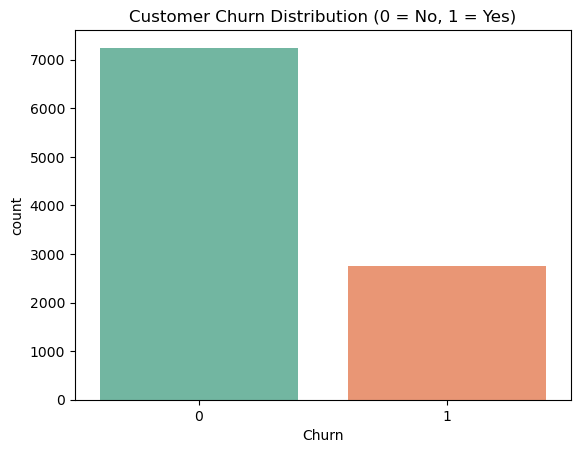

In [20]:
sns.countplot(x='Churn', data=df, palette="Set2")
plt.title("Customer Churn Distribution (0 = No, 1 = Yes)")
plt.show()


In [30]:
# Contract type vs churn
contract_churn = pd.crosstab(df['Contract'], df['Churn'], normalize='index') * 100
print(contract_churn)

Churn                   0          1
Contract                            
Month-to-month  59.956749  40.043251
One year        85.108086  14.891914
Two year        91.807476   8.192524


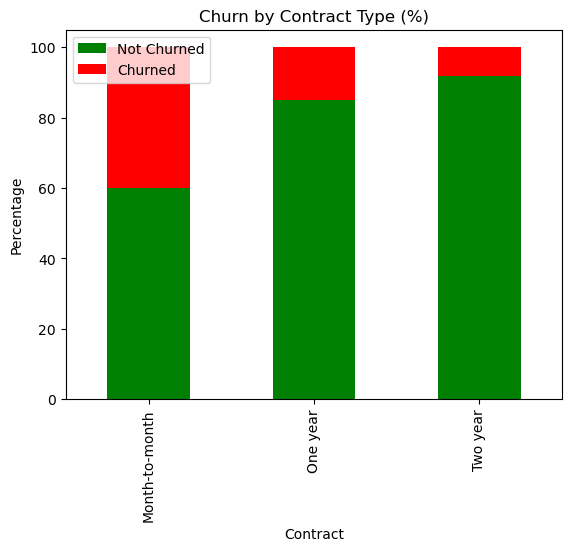

In [23]:
# # Contract type vs churn
# contract_churn = pd.crosstab(df['Contract'], df['Churn'], normalize='index') * 100
# print(contract_churn)

# Plot
contract_churn.plot(kind='bar', stacked=True, color=['green','red'])
plt.title("Churn by Contract Type (%)")
plt.ylabel("Percentage")
plt.legend(["Not Churned", "Churned"])
plt.show()   


In [24]:
# Create tenure groups
bins = [0, 12, 24, 48, 72]
labels = ['0-12 months', '13-24 months', '25-48 months', '49-72 months']
df['TenureGroup'] = pd.cut(df['Tenure'], bins=bins, labels=labels, right=True)

# Churn by tenure group
tenure_churn = pd.crosstab(df['TenureGroup'], df['Churn'], normalize='index') * 100
print(tenure_churn)



Churn                 0          1
TenureGroup                       
0-12 months   68.173599  31.826401
13-24 months  73.677812  26.322188
25-48 months  73.805203  26.194797
49-72 months  72.654867  27.345133


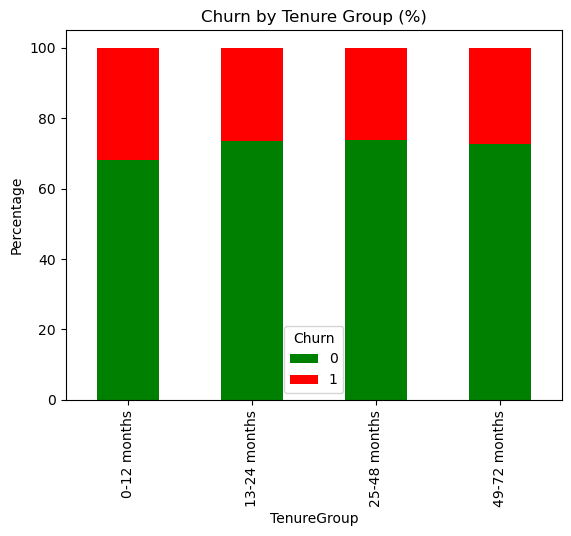

In [25]:
# Plot
tenure_churn.plot(kind='bar', stacked=True, color=['green','red'])
plt.title("Churn by Tenure Group (%)")
plt.ylabel("Percentage")
plt.show()

C:\Users\kunal gautam\AppData\Local\Temp\ipykernel_65404\1861372611.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='MonthlyCharges', data=df, palette="Set3")


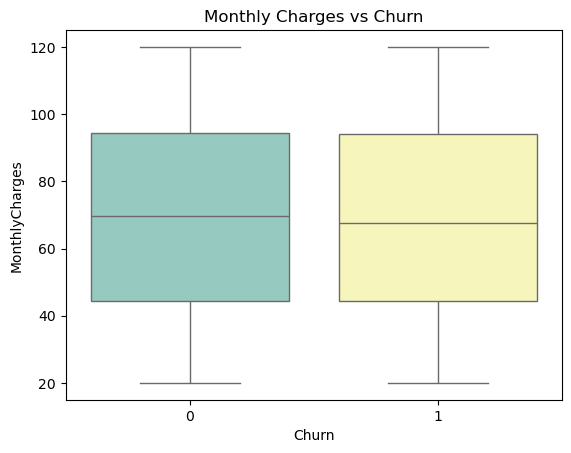

In [26]:
# Boxplot to compare monthly charges between churned vs retained
sns.boxplot(x='Churn', y='MonthlyCharges', data=df, palette="Set3")
plt.title("Monthly Charges vs Churn")
plt.show()


# <span style="background-color:black; color:white;"> Insights</span>

In [ ]:
Overall churn rate → ~20–30% customers leave.

Contract type → Month-to-month customers churn far more than yearly ones.

Tenure → Short-tenure customers churn the most; long-tenure ones rarely leave.

Monthly charges → Higher paying customers tend to churn more.

In [31]:
df.to_csv("cleaned_telecom_churn.csv", index=False)
print("File saved as cleaned_telecom_churn.csv")

File saved as cleaned_telecom_churn.csv
